### Histogram
A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

In [1]:
%%capture
!pip3 install xlrd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_can = pd.read_excel(
    'data/canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

In [4]:
df_can.columns = list(map(lambda x: str(x), df_can.columns))

In [5]:
drops = [
    'AREA', 
    'REG', 
    'DEV', 
    'Type', 
    'Coverage'
]
df_can.drop(columns=drops, inplace=True)

In [6]:
columns = {
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region'
}

df_can.rename(columns=columns, inplace=True)

In [7]:
df_can.set_index('Country', inplace=True)

In [8]:
df_can['Total'] = df_can.sum(axis=1)

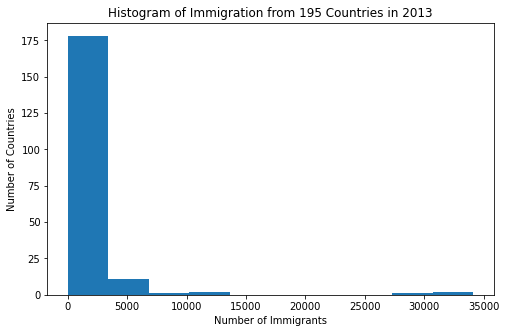

In [9]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population. 

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:

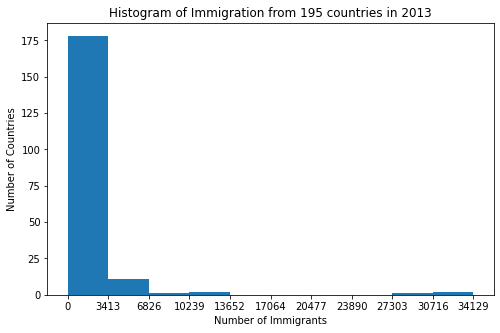

In [10]:
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()